# Treinando o modelo - heart failure

Fonte: https://medium.com/analytics-vidhya/heart-failure-prediction-in-python-70ce2a033a18

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bases de dados/203_204_heart failure modelo e deploy/heart_failure.csv')
print('Data read successfully')

data_1 = data.copy()

data.head()

In [ ]:
#From this we infer that our dataset contains 299 instances and 13 features. Furthermore, there are no missing values.
data.shape
data.info()
data.describe(include='all')
data.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


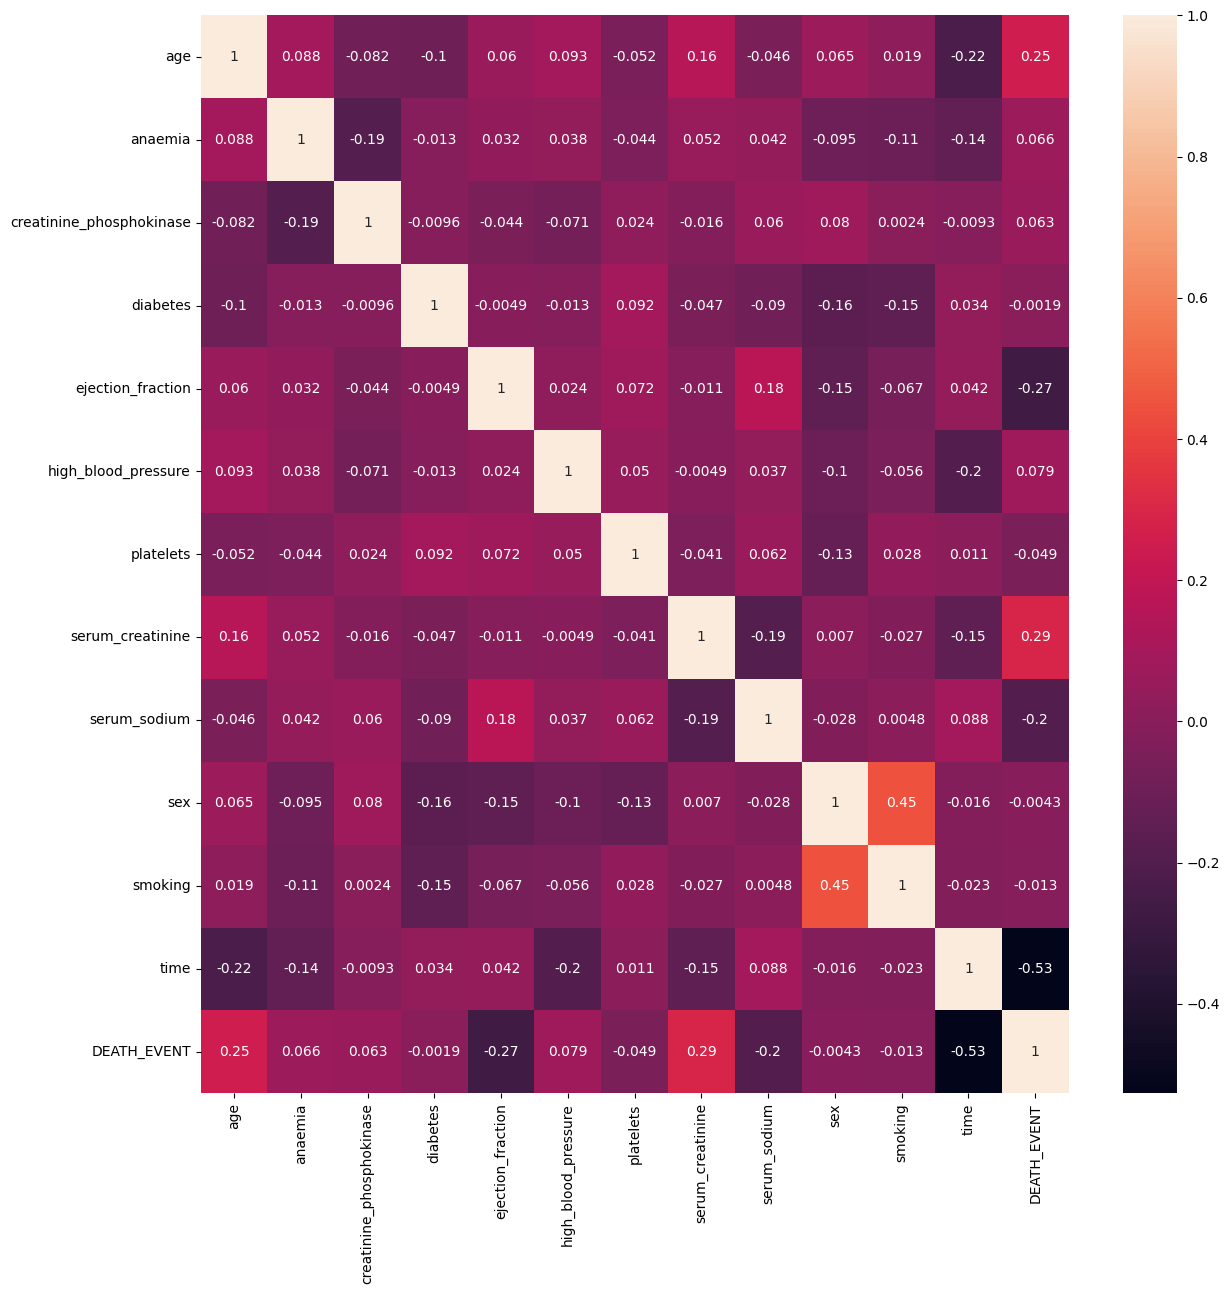

In [ ]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True)
plt.show()

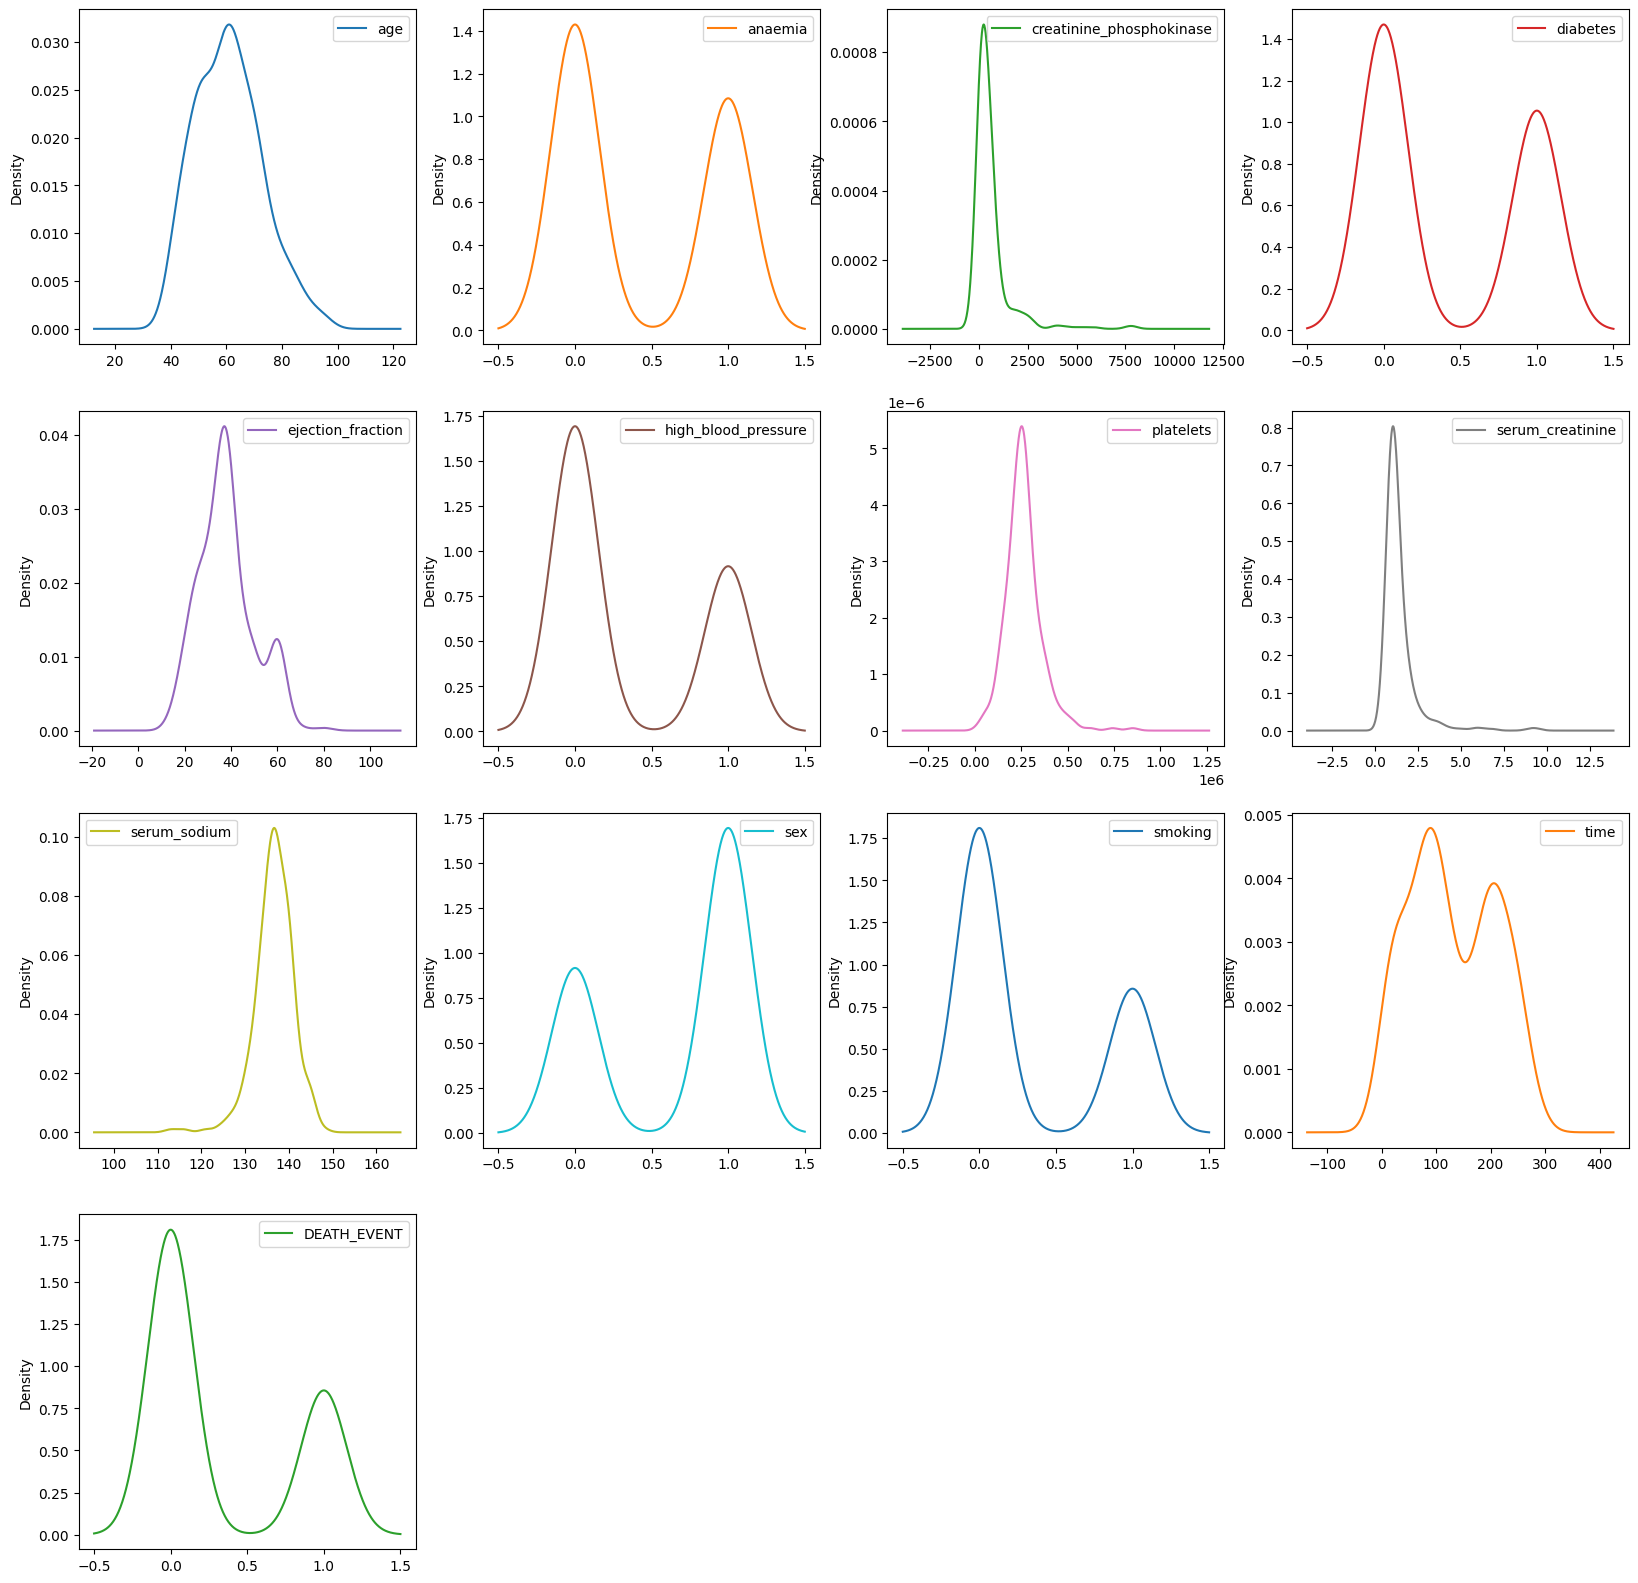

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

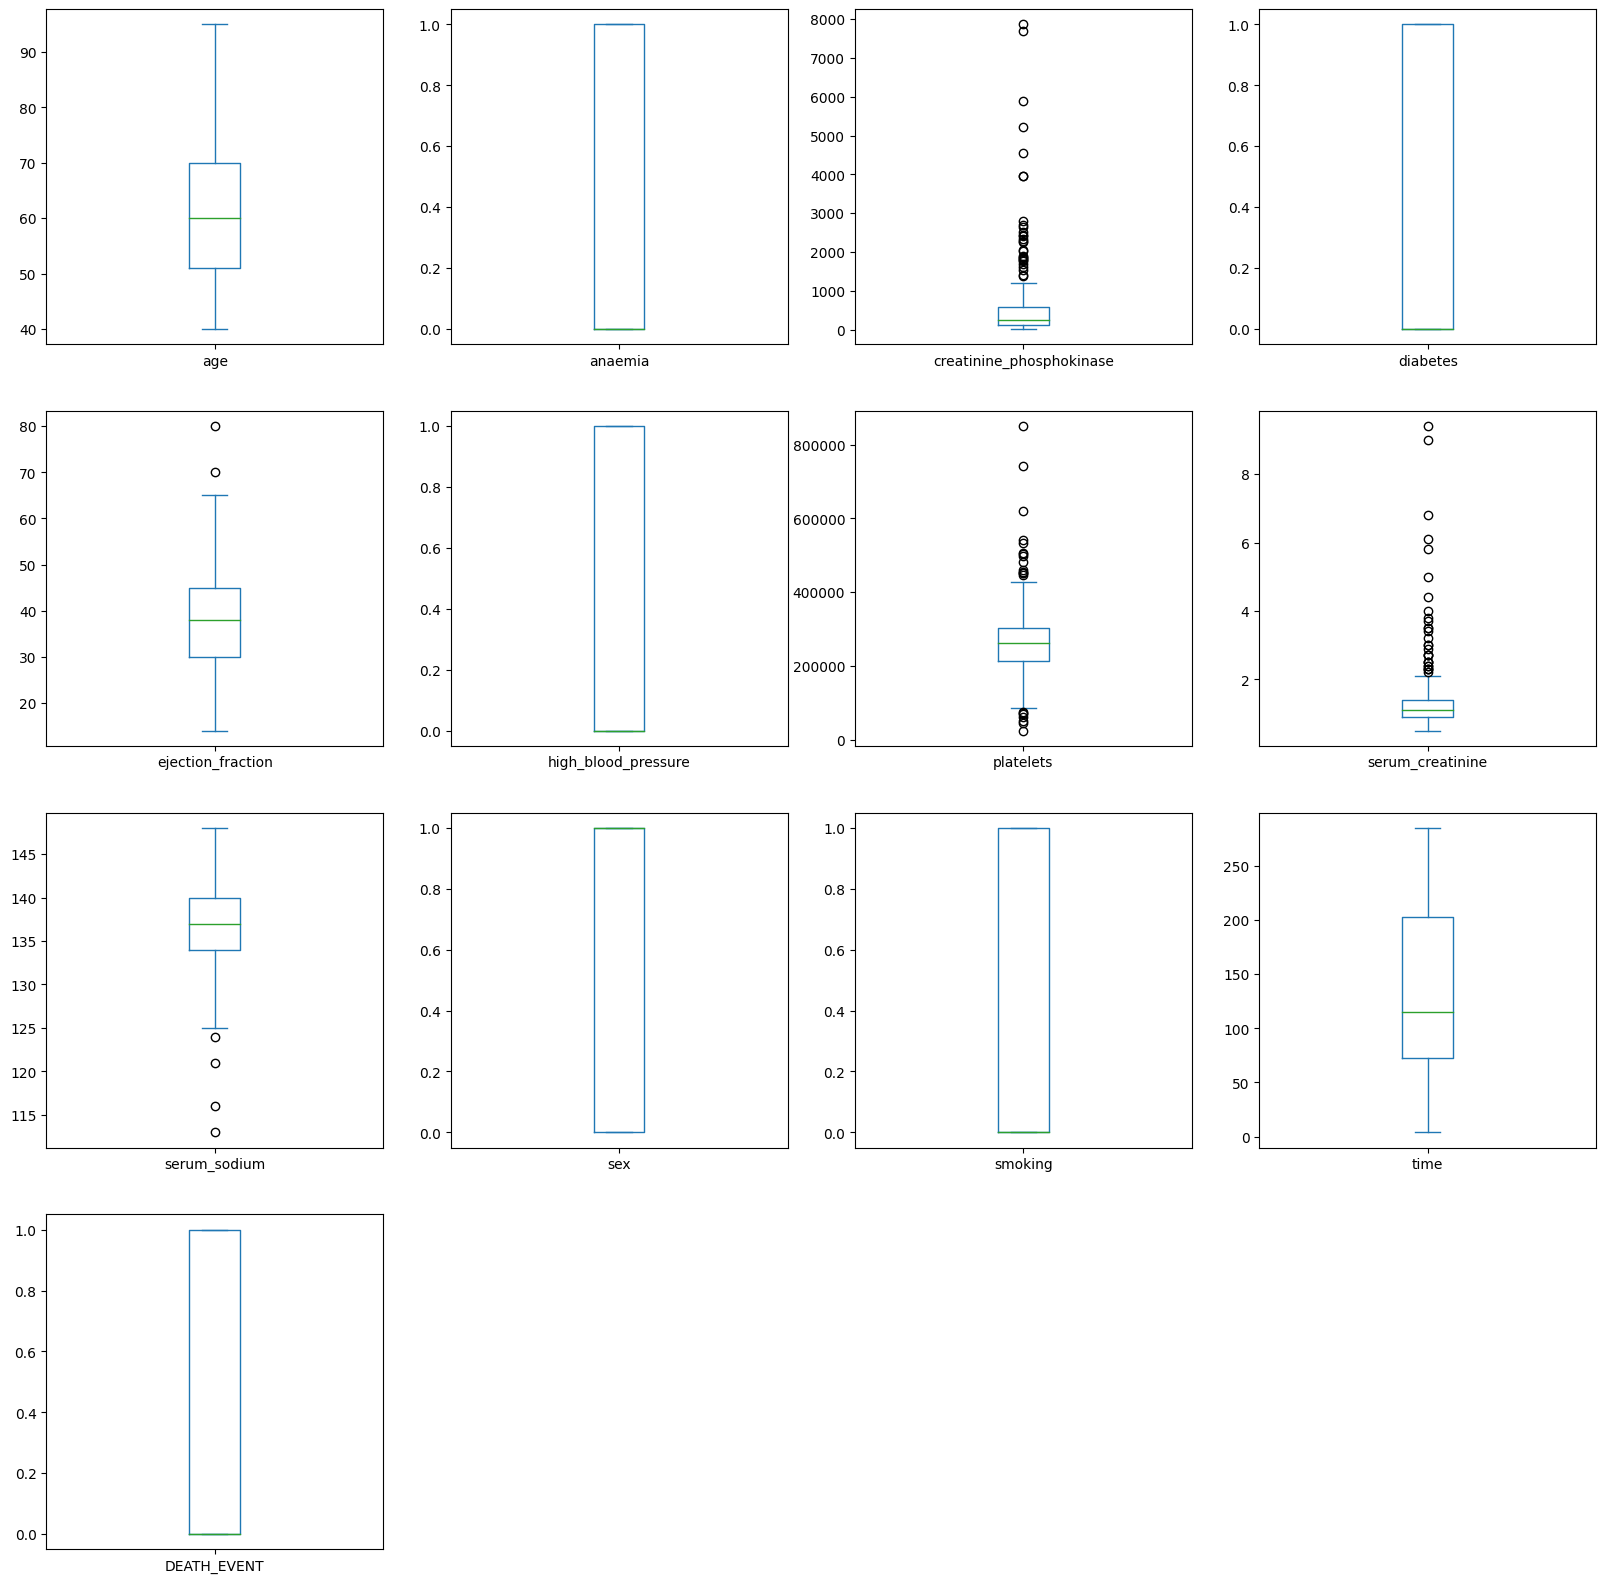

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

Essa etapa é chamada de "feature engineering", criação de funcionalidades na base de dados

Percentage of Super Senior people lose their life : 72.22222222222221


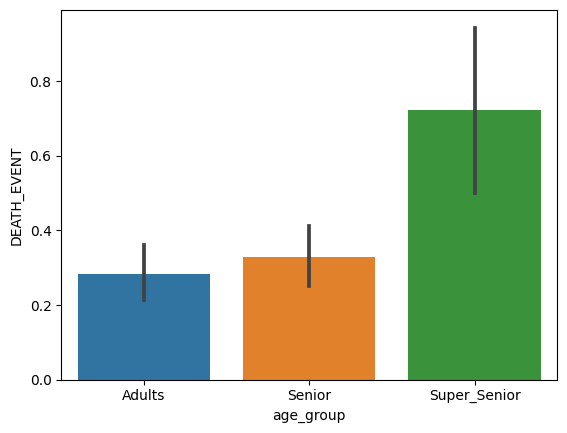

In [ ]:
#For the Age feature, we will build a new feature by putting the age groups into and exploring.
bins = [40, 60, 80, np.nan]
labels = ['Adults', 'Senior', 'Super_Senior']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

print('Percentage of Super Senior people lose their life :', data['DEATH_EVENT'][data['age_group']=='Super_Senior'].value_counts(normalize=True)[1]*100)

sns.barplot(x='age_group', y='DEATH_EVENT', data=data)
plt.show()

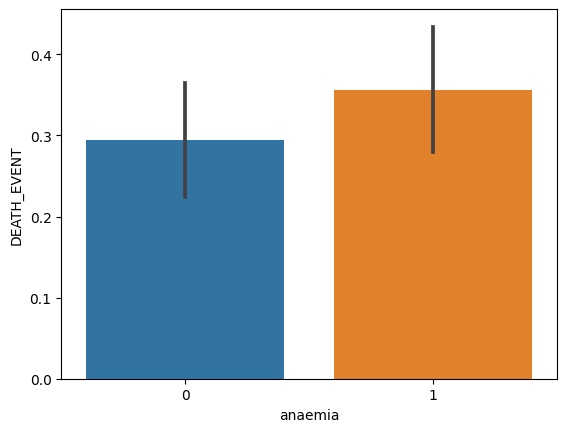

In [ ]:
sns.barplot(x='anaemia', y='DEATH_EVENT', data=data)
plt.show()

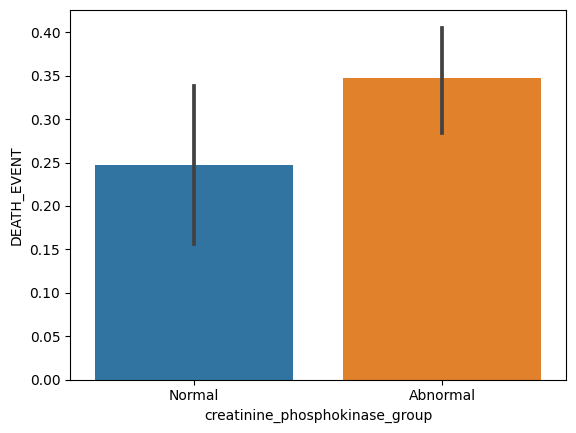

In [ ]:
#Creatinine Phosphokinase: Level of the CPK enzyme in the blood. As we know the Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)
bins = [10, 120, np.nan]
labels = ['Normal','Abnormal']
data['creatinine_phosphokinase_group'] = pd.cut(data['creatinine_phosphokinase'], bins=bins, labels=labels)

sns.barplot(x='creatinine_phosphokinase_group', y='DEATH_EVENT', data=data)
plt.show()

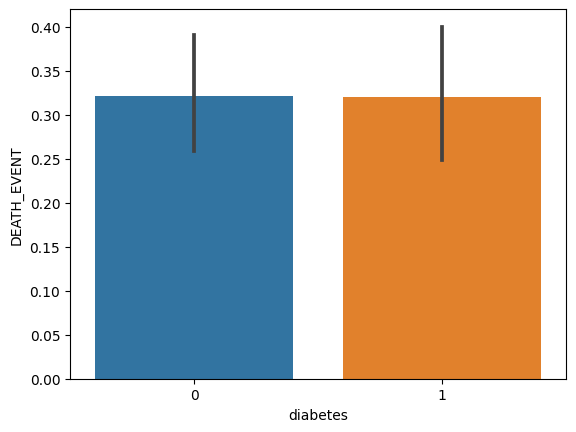

In [ ]:
sns.barplot(x='diabetes', y='DEATH_EVENT', data=data)
plt.show()

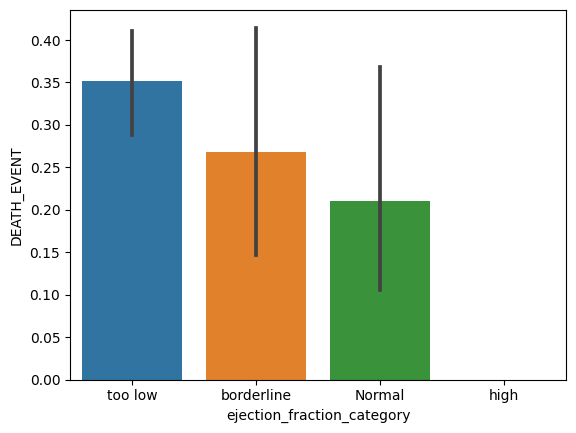

In [ ]:
#Ejection Fraction: Percentage of blood leaving the heart at each contraction
bins = [0, 41, 50, 70, np.nan]
labels = ['too low', 'borderline', 'Normal', 'high']
data['ejection_fraction_category'] = pd.cut(data['ejection_fraction'], bins=bins, labels=labels)

data['ejection_fraction_category'].value_counts()

sns.barplot(x='ejection_fraction_category', y='DEATH_EVENT', data=data)
plt.show()
#The result of the value count will be: too low 219, borderline 41, Normal 38, high 1
#If a person’s ejection_fraction is in the too low category then they have more chances of Heart Failure.

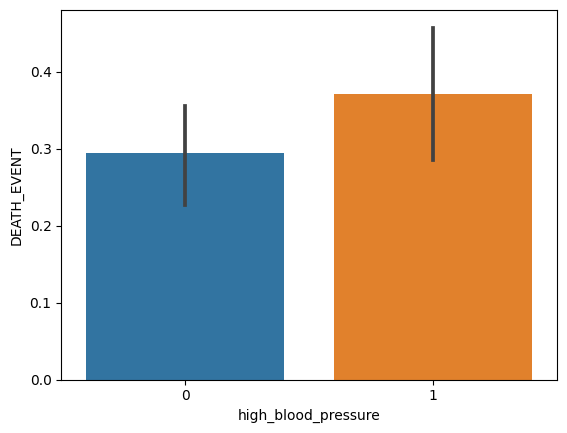

Percentage of people resulted in Heart Failure having high blood pressure :  37.142857142857146


In [ ]:
#High Blood Pressure
sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', data=data)
plt.show()
print('Percentage of people resulted in Heart Failure having high blood pressure : ', data['DEATH_EVENT'][data['high_blood_pressure']==1].value_counts(normalize=True)[1]*100)

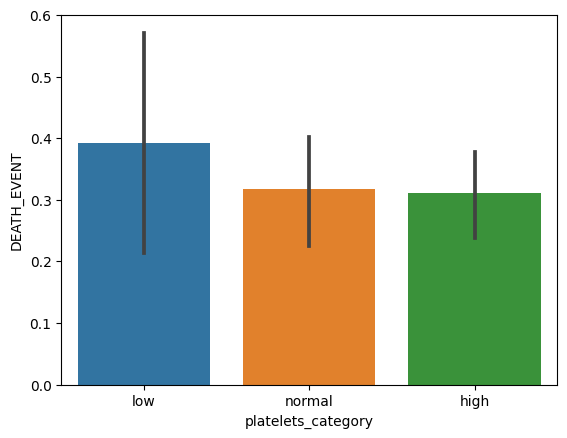

In [ ]:
#Platelets : Platelets in the blood (kiloplatelets/mL)
bins =[0, 150000, 250000, np.nan]
labels =['low', 'normal', 'high']
data['platelets_category'] = pd.cut(data['platelets'], bins=bins, labels=labels)

sns.barplot(x='platelets_category', y='DEATH_EVENT', data=data)
plt.show()

In this way, one can check the relation of all the independent features with the dependent feature.



In [ ]:
#usando a cópia do dataset para separar classe e previsores (x)
array = data_1.values
X = array[:, :12]
Y = array[:, 12]

In [ ]:
#usando a cópia do dataset para separar treinamento/teste e treinar
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.67, random_state=1)

In [ ]:
# Standard Scalar
scalar = StandardScaler()
rescaled_X = scalar.fit_transform(x_train)
print(rescaled_X[:5])

[[-0.24551621  1.13095967  1.51464342  1.28399714  0.04496884 -0.81302949
   0.2879158  -0.3726744   0.84019006 -1.37198868 -0.66421116  0.79189932]
 [-0.24551621  1.13095967 -0.51530291 -0.77881794 -1.58723367 -0.81302949
  -0.49111079 -0.633982    0.43755619  0.72886899  1.50554531 -0.6772304 ]
 [ 0.01888586  1.13095967  1.0475922  -0.77881794  0.45301947 -0.81302949
  -1.78291436 -0.633982    0.03492233  0.72886899 -0.66421116  0.77901221]
 [ 0.19515391 -0.88420483 -0.45078806 -0.77881794  0.8610701  -0.81302949
  -0.58972175 -0.28557187  1.6454578   0.72886899  1.50554531  0.95943165]
 [-0.24551621 -0.88420483 -0.32811896 -0.77881794 -0.36308178 -0.81302949
   0.24847141  0.23704332  0.63887313  0.72886899 -0.66421116  1.60378679]]


In [ ]:
# Recursive Feature Elimination

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=6, step=1)
fit = rfe.fit(rescaled_X, y_train)

transformed_X = fit.transform(rescaled_X)

print(data_1.columns)
print('Num features : ', fit.n_features_)
print('Selected features : ', fit.support_)
print('Features ranking : ', fit.ranking_)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Num features :  6
Selected features :  [ True  True False False  True False False  True  True False False  True]
Features ranking :  [1 1 2 6 1 5 4 1 1 3 7 1]


As we can see we have selected the 6 best features from our dataset which we will use for model building.

After that, we will now spot-check different algorithms to find the best algorithms for the given dataset.

In [ ]:
# Spot checking Algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis())) #uma espécie de regressão, mas linear
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('ETC', ExtraTreesClassifier()))

# evaluate each model
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, transformed_X, y_train,cv=kfold, scoring='accuracy') #avaliando a acurácia, apenas
  results.append(cv_results)
  names.append(name)
  print(name, ':', cv_results.mean()*100)

LR : 85.66666666666669
LDA : 88.66666666666667
KNN : 79.66666666666667
SVM : 86.66666666666669
GNB : 81.44444444444446
ETC : 84.66666666666667


In [ ]:
#Criando um pipeline (fluxo) para treinamento do modelo LDA, o melhor
steps = [('scaler', StandardScaler()), #escalona os dados
         ('RFE', RFE(LogisticRegression(), n_features_to_select=6, step=1)), #elimina atributos desnecessários
         ('lda', LinearDiscriminantAnalysis())] #treina o algoritmo selecionado

pipeline = Pipeline(steps)
pipeline.fit(x_train, y_train)
predictions = pipeline.predict(x_test)
print('The accurcay score of the test dataset : ', accuracy_score(y_test, predictions))
print('\nThe confusion matrix : \n', confusion_matrix(y_test, predictions))
print('\nFinally the classification report : \n', classification_report(y_test, predictions))
print('Score : ', pipeline.score(x_test, y_test))

The accurcay score of the test dataset :  0.7860696517412935

The confusion matrix : 
 [[120  15]
 [ 28  38]]

Finally the classification report : 
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       135
         1.0       0.72      0.58      0.64        66

    accuracy                           0.79       201
   macro avg       0.76      0.73      0.74       201
weighted avg       0.78      0.79      0.78       201

Score :  0.7860696517412935


In [ ]:
# saving the model
pickle.dump(pipeline, open('model.pkl', 'wb'))

# Deployment

Fonte: https://medium.datadriveninvestor.com/machine-learning-model-deployment-using-flask-in-google-colab-1f718693a3c0

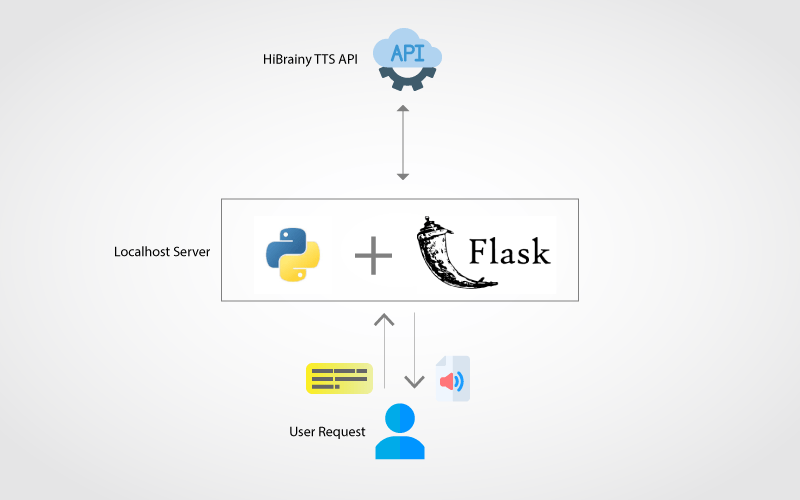

In [ ]:
!pip install flask_ngrok

In [ ]:
#importar template em html para input dos parâmetros previsores
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
from zipfile import ZipFile

file_name = '/content/drive/MyDrive/Bases de dados/203_204_heart failure modelo e deploy/templates.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extracted Successfully')

Extracted Successfully


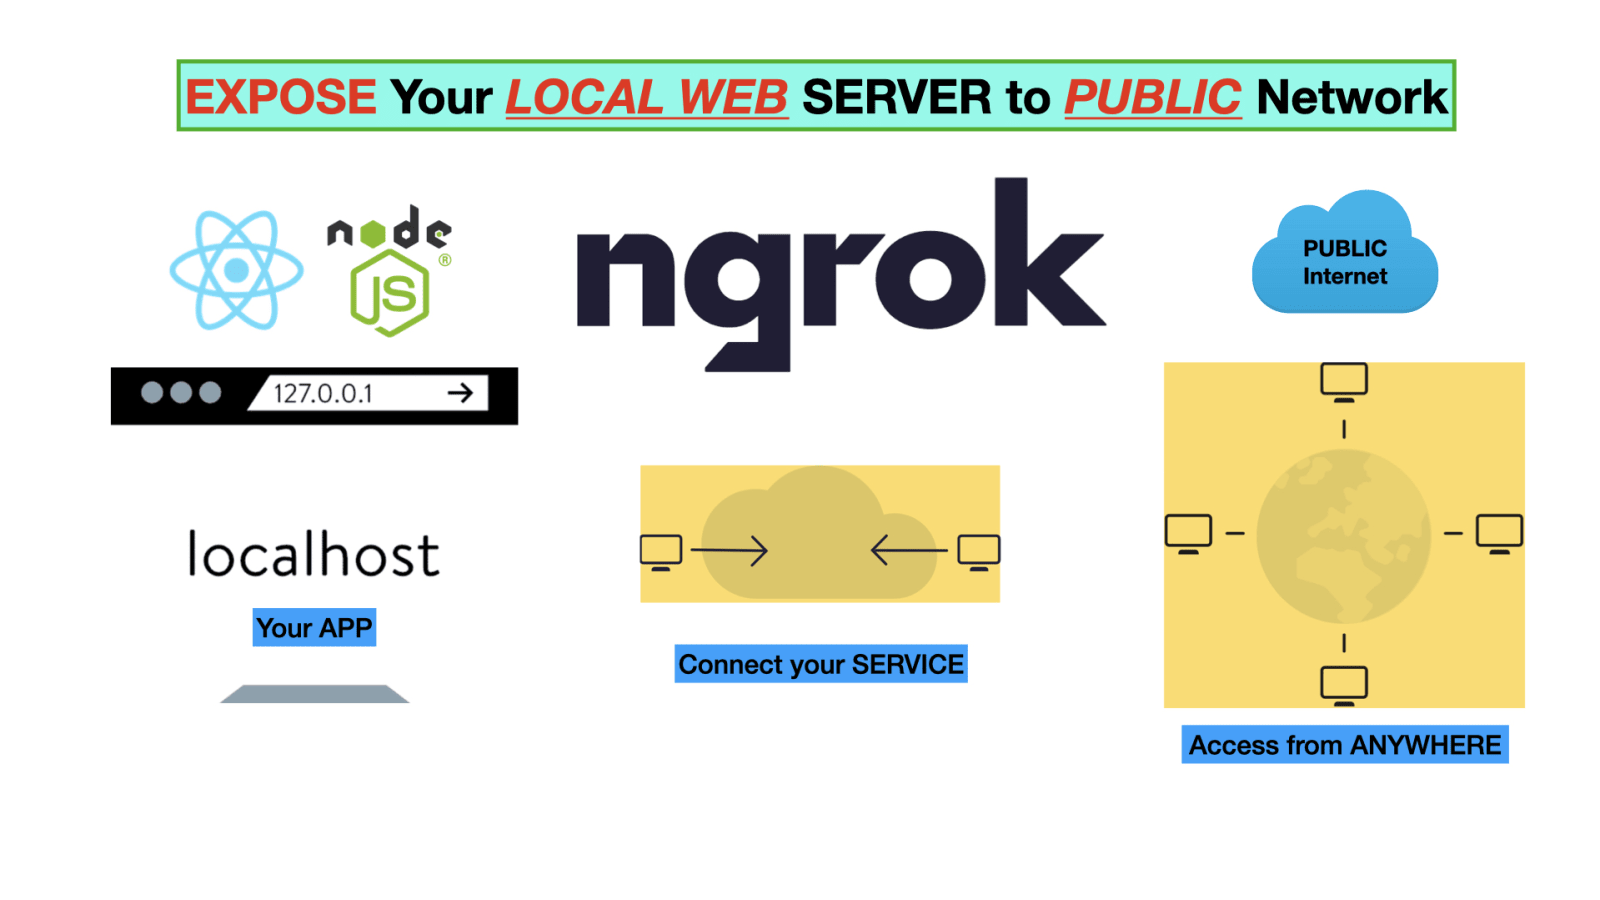

In [ ]:
#vamos rodar o ngrok, então precisaremos de uma conta gratuita e autorizar a conta por aqui: https://ngrok.com/
!pip install pyngrok
!ngrok config add-authtoken CCCCCXXXX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=4660ba9090b964486aaa528963260b772bcf2db6690c22508ee325536346a5b9
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
pip install modelbit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runti

In [ ]:
import modelbit

mb = modelbit.login()

No código acima, primeiro executamos o aplicativo flask e iniciamos o ngrok quando o aplicativo está em execução, em seguida, carregamos o modelo usando pickle. Depois disso, criaremos um método GET e retornaremos a página raiz usando o render_template. Vamos definir a função home para obter os valores da página para que possamos prever.

Depois disso, criaremos um método POST para renderizar os resultados na Interface Gráfica do Usuário HTML (GUI). Nele, definimos a função de previsão que recebe valores usando a solicitação e retorna os resultados.